<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов.

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [2]:
class CustomLinearReg:
    def __init__(self):
        pass

    def fit(X, y):
        pass

    def predict(X):
        pass

**Задание высокого уровня**

1. разделите датасет с домами Бостона  (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

# Задание простого уровня

Лучшая степень полинома: 10
Лучший R2-score: 0.9846


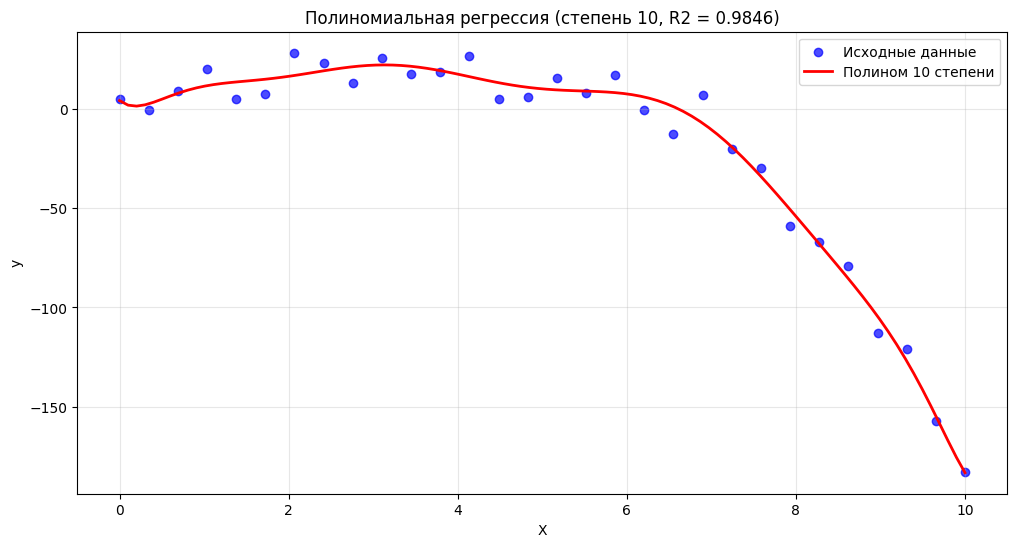

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Создадим пример данных
np.random.seed(42)
X = np.linspace(0, 10, 30)
y = 2 * X + 3 * X**2 - 0.5 * X**3 + np.random.normal(0, 10, 30)

# Grid Search для поиска лучшей степени полинома
best_degree = 0
best_r2 = -np.inf
best_model = None
best_predictions = None

for degree in range(1, 11):
    # Создаем полиномиальные признаки
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))

    # Обучаем модель
    model = LinearRegression()
    model.fit(X_poly, y)

    # Предсказания
    y_pred = model.predict(X_poly)

    # Вычисляем R2-score
    r2 = r2_score(y, y_pred)

    # Обновляем лучшую модель
    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree
        best_model = model
        best_poly = poly

print(f"Лучшая степень полинома: {best_degree}")
print(f"Лучший R2-score: {best_r2:.4f}")

# Предсказания лучшей моделью
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
X_test_poly = best_poly.transform(X_test)
y_test_pred = best_model.predict(X_test_poly)

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Исходные данные')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label=f'Полином {best_degree} степени')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Полиномиальная регрессия (степень {best_degree}, R2 = {best_r2:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Задание среднего уровня

In [5]:
class CustomLinearReg:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Обучение модели с аналитическим решением
        w = (X^T * X)^(-1) * X^T * y
        """
        # Добавляем столбец единиц для intercept
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

        # Аналитическое решение: w = (X^T * X)^(-1) * X^T * y
        try:
            w = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
            self.intercept_ = w[0]
            self.coef_ = w[1:]
        except np.linalg.LinAlgError:
            # Если матрица вырождена, используем псевдообратную
            w = np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
            self.intercept_ = w[0]
            self.coef_ = w[1:]

    def predict(self, X):
        """Предсказание значений"""
        if self.coef_ is None or self.intercept_ is None:
            raise ValueError("Модель не обучена. Сначала вызовите fit()")

        return self.intercept_ + X @ self.coef_

# Тестирование кастомной модели
np.random.seed(42)
X_test_custom = np.random.randn(100, 2)
y_test_custom = 3 + 2 * X_test_custom[:, 0] + 1.5 * X_test_custom[:, 1] + np.random.normal(0, 0.1, 100)

custom_model = CustomLinearReg()
custom_model.fit(X_test_custom, y_test_custom)

print("Кастомная модель:")
print(f"Intercept: {custom_model.intercept_:.4f}")
print(f"Coefficients: {custom_model.coef_}")

# Сравнение с sklearn
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X_test_custom, y_test_custom)

print("\nSklearn модель:")
print(f"Intercept: {sklearn_model.intercept_:.4f}")
print(f"Coefficients: {sklearn_model.coef_}")

# Проверка предсказаний
custom_pred = custom_model.predict(X_test_custom)
sklearn_pred = sklearn_model.predict(X_test_custom)

print(f"\nR2-score кастомной модели: {r2_score(y_test_custom, custom_pred):.4f}")
print(f"R2-score sklearn модели: {r2_score(y_test_custom, sklearn_pred):.4f}")

Кастомная модель:
Intercept: 3.0093
Coefficients: [2.01907203 1.48278579]

Sklearn модель:
Intercept: 3.0093
Coefficients: [2.01907203 1.48278579]

R2-score кастомной модели: 0.9979
R2-score sklearn модели: 0.9979


# Задание высокого уровня

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Загружаем датасет (Boston deprecated, используем California housing)
housing = fetch_california_housing()
X, y = housing.data, housing.target

print(f"Размер датасета: {X.shape}")

# 1. Разделение на train/valid
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train set: {X_train.shape}")
print(f"Valid set: {X_valid.shape}")

# Без нормализации
model_no_norm = LinearRegression()
model_no_norm.fit(X_train, y_train)
y_pred_no_norm = model_no_norm.predict(X_valid)
r2_no_norm = r2_score(y_valid, y_pred_no_norm)

print(f"\nБез нормализации:")
print(f"R2-score на валидации: {r2_no_norm:.4f}")

# С z-нормализацией
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

model_with_norm = LinearRegression()
model_with_norm.fit(X_train_scaled, y_train)
y_pred_with_norm = model_with_norm.predict(X_valid_scaled)
r2_with_norm = r2_score(y_valid, y_pred_with_norm)

print(f"\nС z-нормализацией:")
print(f"R2-score на валидации: {r2_with_norm:.4f}")

# Сравнение
print(f"\nИзменение R2-score: {r2_with_norm - r2_no_norm:.4f}")

# Нормализация таргета тоже
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.reshape(-1, 1)).flatten()

model_full_norm = LinearRegression()
model_full_norm.fit(X_train_scaled, y_train_scaled)
y_pred_full_norm = model_full_norm.predict(X_valid_scaled)
r2_full_norm = r2_score(y_valid_scaled, y_pred_full_norm)

print(f"\nС полной нормализацией (X и y):")
print(f"R2-score на валидации: {r2_full_norm:.4f}")

Размер датасета: (20640, 8)
Train set: (16512, 8)
Valid set: (4128, 8)

Без нормализации:
R2-score на валидации: 0.5758

С z-нормализацией:
R2-score на валидации: 0.5758

Изменение R2-score: -0.0000

С полной нормализацией (X и y):
R2-score на валидации: 0.5758
